In [1]:
import pandas as pd
import numpy as np

In [3]:
demand = pd.read_csv('Demand.csv')
inventory = pd.read_csv('Inventory.csv')
skulist = pd.read_csv('SKUList.csv')

In [4]:
demand.head(10)

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Sales,559,"1,738",755,769,519,919,519,709,779,589,519,699
1,110053,GM,333,790,452,457,309,547,309,422,459,350,309,416
2,110053,Eaches,56,234,75,77,52,92,52,71,79,59,52,70
3,110053,Weight,15,61,20,20,14,24,14,18,21,15,14,18
4,110053,Volume,1,5,1,1,1,2,1,1,2,1,1,1
5,110054,Sales,300,"1,434",777,450,380,557,300,380,450,350,330,526
6,110054,GM,178,648,457,267,226,331,178,226,267,208,196,312
7,110054,Eaches,30,194,79,45,38,56,30,38,45,35,33,53
8,110054,Weight,7,43,17,10,8,12,7,8,10,8,7,12
9,110054,Volume,1,4,2,1,1,1,1,1,1,1,1,1


In [5]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114625 entries, 0 to 114624
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   SKU      114625 non-null  int64 
 1   Measure  114625 non-null  object
 2   Jan      114625 non-null  object
 3   Feb      114625 non-null  object
 4   Mar      114625 non-null  object
 5   Apr      114625 non-null  object
 6   May      114625 non-null  object
 7   Jun      114625 non-null  object
 8   Jul      114625 non-null  object
 9   Aug      114625 non-null  object
 10  Sep      114625 non-null  object
 11  Oct      114625 non-null  object
 12  Nov      114625 non-null  object
 13  Dec      114625 non-null  object
dtypes: int64(1), object(13)
memory usage: 12.2+ MB


In [6]:
demand.query('SKU==8355182')

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
71205,8355182,Sales,"-2,395","-5,880","-3,788","61,600","62,349","44,551","42,776","1,05,729","76,918","72,727","1,10,466","1,12,367"
71206,8355182,Weight,900,-600,300,"18,900","19,500","14,100","13,200","35,700","26,400","27,600","47,100","51,600"
71207,8355182,GM,"-4,268","-4,633","-4,407","21,842","21,346","15,021","15,279","30,559","21,324","15,072","12,582","5,422"
71208,8355182,Volume,83,-55,28,"1,747","1,802","1,303","1,220","3,300","2,440","2,551","4,353","4,769"
71209,8355182,Eaches,3,-2,1,63,65,47,44,119,88,92,157,172


In [7]:
# Converting object datatypes into integers
def str2int(val):
    while ',' in val:
        val = val.replace(',','')
    return int(val)

In [8]:
# Applying the function in all the columns except SKU,Measure
for col in demand:
    if col not in ['SKU','Measure']:
        demand[col] = demand[col].apply(str2int)

In [9]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114625 entries, 0 to 114624
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   SKU      114625 non-null  int64 
 1   Measure  114625 non-null  object
 2   Jan      114625 non-null  int64 
 3   Feb      114625 non-null  int64 
 4   Mar      114625 non-null  int64 
 5   Apr      114625 non-null  int64 
 6   May      114625 non-null  int64 
 7   Jun      114625 non-null  int64 
 8   Jul      114625 non-null  int64 
 9   Aug      114625 non-null  int64 
 10  Sep      114625 non-null  int64 
 11  Oct      114625 non-null  int64 
 12  Nov      114625 non-null  int64 
 13  Dec      114625 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 12.2+ MB


In [10]:
demand.describe()

,SKU,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,1.146250e+05,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000,114625.000000
mean,7.594035e+06,347.447983,392.003306,602.382630,530.168393,546.259045,693.403629,482.956048,472.515673,610.993597,520.810111,501.451176,763.221104
std,1.902688e+06,1558.384391,1840.267163,3117.235636,2597.016859,2528.449794,3171.785055,2240.638741,2216.768581,2689.077506,2551.897050,2458.472125,3828.715727
min,1.100530e+05,-4268.000000,-5880.000000,-4594.000000,-9290.000000,-5235.000000,-4366.000000,-2617.000000,-7134.000000,-7346.000000,-4274.000000,-5335.000000,-4455.000000
25%,8.092744e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.297392e+06,6.000000,7.000000,11.000000,7.000000,8.000000,10.000000,7.000000,8.000000,12.000000,10.000000,9.000000,15.000000
75%,8.404212e+06,127.000000,141.000000,204.000000,177.000000,187.000000,233.000000,165.000000,168.000000,224.000000,179.000000,170.000000,260.000000
max,8.495053e+06,100784.000000,139321.000000,260455.000000,189586.000000,140077.000000,170983.000000,124635.000000,159956.000000,156173.000000,165588.000000,121950.000000,243200.000000


In [11]:
demand.query('SKU==8355182')

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
71205,8355182,Sales,-2395,-5880,-3788,61600,62349,44551,42776,105729,76918,72727,110466,112367
71206,8355182,Weight,900,-600,300,18900,19500,14100,13200,35700,26400,27600,47100,51600
71207,8355182,GM,-4268,-4633,-4407,21842,21346,15021,15279,30559,21324,15072,12582,5422
71208,8355182,Volume,83,-55,28,1747,1802,1303,1220,3300,2440,2551,4353,4769
71209,8355182,Eaches,3,-2,1,63,65,47,44,119,88,92,157,172


In [12]:
inventory.head(10)

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Eaches,489,186,278,279,506,440,293,303,130,537,518,100
1,110054,Eaches,247,61,53,263,23,244,131,16,96,76,163,234
2,110056,Eaches,302,44,282,340,121,311,168,286,300,93,208,255
3,110124,Eaches,209,367,520,336,475,375,173,205,396,286,310,481
4,110125,Eaches,352,310,402,155,342,453,380,472,327,414,381,144
5,110127,Eaches,3,7,4,8,12,7,9,9,2,8,3,7
6,110132,Eaches,11,41,32,8,7,25,4,33,4,23,7,38
7,110239,Eaches,250,32,336,14,55,70,18,318,299,49,134,380
8,110742,Eaches,180,401,162,206,75,316,303,347,62,217,41,93
9,111120,Eaches,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22923 entries, 0 to 22922
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SKU     22923 non-null  int64 
 1   UOM     22923 non-null  object
 2   Jan     22923 non-null  int64 
 3   Feb     22923 non-null  int64 
 4   Mar     22923 non-null  int64 
 5   Apr     22923 non-null  int64 
 6   May     22923 non-null  int64 
 7   Jun     22923 non-null  int64 
 8   Jul     22923 non-null  int64 
 9   Aug     22923 non-null  int64 
 10  Sep     22923 non-null  int64 
 11  Oct     22923 non-null  int64 
 12  Nov     22923 non-null  int64 
 13  Dec     22923 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 2.4+ MB


In [14]:
inventory.describe()

,SKU,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,2.292300e+04,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000
mean,7.594275e+06,412.004799,417.870000,426.643240,396.634036,426.327226,410.054356,431.705754,435.151202,413.055185,423.181913,424.058457,435.887667
std,1.902327e+06,4041.676861,4352.979105,3758.186981,2753.998260,3894.697242,3286.699498,4969.672025,5413.293251,3438.741966,4269.872190,4627.047966,4544.558093
min,1.100530e+05,-767.000000,-1027.000000,-669.000000,-902.000000,-563.000000,-491.000000,-811.000000,-871.000000,-1063.000000,-1056.000000,-1092.000000,-387.000000
25%,8.092748e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.297392e+06,38.000000,39.000000,38.000000,38.000000,37.000000,39.000000,37.000000,37.000000,38.000000,39.000000,37.000000,37.000000
75%,8.404208e+06,257.000000,256.000000,258.000000,257.000000,253.000000,257.500000,254.500000,258.000000,259.000000,253.000000,258.000000,258.000000
max,8.495053e+06,444942.000000,501158.000000,288808.000000,194919.000000,231000.000000,227422.000000,568039.000000,579381.000000,272200.000000,457463.000000,526897.000000,494062.000000


In [15]:
skulist.head(10)

,SKU,CategoryID,SKU.1,SupplierID
0,110053,460,Active,3452
1,110054,460,Active,3452
2,110056,460,Active,3452
3,110124,460,Active,3452
4,110125,460,Active,3452
5,110127,700,Pre Active,2075
6,110132,460,Pre Active,2044
7,110239,460,Active,52070
8,110742,460,Active,52070
9,111120,460,Discontinued,2044


In [16]:
skulist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22923 entries, 0 to 22922
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         22923 non-null  int64 
 1   CategoryID  22923 non-null  int64 
 2   SKU.1       22923 non-null  object
 3   SupplierID  22923 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 716.5+ KB


In [17]:
skulist.describe()

,SKU,CategoryID,SupplierID
count,2.292300e+04,22923.000000,22923.000000
mean,7.594275e+06,348.244122,20294.724120
std,1.902327e+06,130.475098,27967.676203
min,1.100530e+05,100.000000,46.000000
25%,8.092748e+06,200.000000,2745.000000
50%,8.297392e+06,350.000000,4503.000000
75%,8.404208e+06,380.000000,40514.000000
max,8.495053e+06,700.000000,999999.000000


# Q1. Normalize the inventory, and demand dataset for these columns (i.e make it flat dataset. each data item listed below should a column header)
Demand Data: SKU, Month, Sales, GM, Eaches, Weight, Volume

Inventory Data: SKU, Month, Units

In [18]:
df1 = demand

In [19]:
df1.head(10)

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Sales,559,1738,755,769,519,919,519,709,779,589,519,699
1,110053,GM,333,790,452,457,309,547,309,422,459,350,309,416
2,110053,Eaches,56,234,75,77,52,92,52,71,79,59,52,70
3,110053,Weight,15,61,20,20,14,24,14,18,21,15,14,18
4,110053,Volume,1,5,1,1,1,2,1,1,2,1,1,1
5,110054,Sales,300,1434,777,450,380,557,300,380,450,350,330,526
6,110054,GM,178,648,457,267,226,331,178,226,267,208,196,312
7,110054,Eaches,30,194,79,45,38,56,30,38,45,35,33,53
8,110054,Weight,7,43,17,10,8,12,7,8,10,8,7,12
9,110054,Volume,1,4,2,1,1,1,1,1,1,1,1,1


In [20]:
# Making new dataframes with only the selected attributes
df_Sales = df1[df1.Measure.str.contains('Sales',case=False)]
df_GM = df1[df1.Measure.str.contains('GM',case=False)]
df_Eaches = df1[df1.Measure.str.contains('Eaches',case=False)]
df_Weight = df1[df1.Measure.str.contains('Weight',case=False)]
df_Volume = df1[df1.Measure.str.contains('Volume',case=False)]

In [21]:
# Making new dataframes using prev dataframe using melt

In [22]:
df_Eaches1 = df_Eaches.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='Eaches')

In [23]:
df_Sales1 = df_Sales.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='Sales')

In [24]:
df_GM1 = df_GM.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='GM')

In [25]:
df_Weight1 = df_Weight.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='Weight')

In [26]:
df_Volume1 = df_Volume.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='Volume')

In [27]:
df_Eaches1.head()

,SKU,Month,Eaches
0,110053,Jan,56
1,110054,Jan,30
2,110056,Jan,35
3,110124,Jan,98
4,110125,Jan,73


In [28]:
df_Sales1.head()

,SKU,Month,Sales
0,110053,Jan,559
1,110054,Jan,300
2,110056,Jan,350
3,110124,Jan,881
4,110125,Jan,656


In [29]:
df_GM1.head()

,SKU,Month,GM
0,110053,Jan,333
1,110054,Jan,178
2,110056,Jan,197
3,110124,Jan,501
4,110125,Jan,377


In [30]:
df_Weight1.head()

,SKU,Month,Weight
0,110053,Jan,15
1,110054,Jan,7
2,110056,Jan,10
3,110124,Jan,55
4,110125,Jan,42


In [31]:
df_Volume1.head()

,SKU,Month,Volume
0,110053,Jan,1
1,110054,Jan,1
2,110056,Jan,1
3,110124,Jan,1
4,110125,Jan,1


In [32]:
print(df_Sales1.shape)
print(df_GM1.shape)
print(df_Eaches1.shape)
print(df_Weight1.shape)
print(df_Volume1.shape)

(275100, 3)
(275100, 3)
(275100, 3)
(275100, 3)
(275100, 3)


In [33]:
# merging all the dataframes
df1_flat = pd.concat([df_Sales1,df_GM1,df_Eaches1,df_Weight1,df_Volume1],axis=1,join='inner')
df1_flat.head()

,SKU,Month,Sales,SKU,Month,GM,SKU,Month,Eaches,SKU,Month,Weight,SKU,Month,Volume
0,110053,Jan,559,110053,Jan,333,110053,Jan,56,110053,Jan,15,110053,Jan,1
1,110054,Jan,300,110054,Jan,178,110054,Jan,30,110054,Jan,7,110054,Jan,1
2,110056,Jan,350,110056,Jan,197,110056,Jan,35,110056,Jan,10,110056,Jan,1
3,110124,Jan,881,110124,Jan,501,110124,Jan,98,110124,Jan,55,110124,Jan,1
4,110125,Jan,656,110125,Jan,377,110125,Jan,73,110125,Jan,42,110125,Jan,1


In [34]:
# Removing duplicate columns
df1_flat = df1_flat.loc[:,~df1_flat.columns.duplicated()]
df1_flat.head()

,SKU,Month,Sales,GM,Eaches,Weight,Volume
0,110053,Jan,559,333,56,15,1
1,110054,Jan,300,178,30,7,1
2,110056,Jan,350,197,35,10,1
3,110124,Jan,881,501,98,55,1
4,110125,Jan,656,377,73,42,1


In [35]:
# Sorting values in terms of SKU
df1_flat.sort_values(by=['SKU'],inplace=True)
df1_flat.head()

,SKU,Month,Sales,GM,Eaches,Weight,Volume
0,110053,Jan,559,333,56,15,1
45850,110053,Mar,755,452,75,20,1
68775,110053,Apr,769,457,77,20,1
91700,110053,May,519,309,52,14,1
114625,110053,Jun,919,547,92,24,2


In [36]:
df2 = inventory
df2.head()

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Eaches,489,186,278,279,506,440,293,303,130,537,518,100
1,110054,Eaches,247,61,53,263,23,244,131,16,96,76,163,234
2,110056,Eaches,302,44,282,340,121,311,168,286,300,93,208,255
3,110124,Eaches,209,367,520,336,475,375,173,205,396,286,310,481
4,110125,Eaches,352,310,402,155,342,453,380,472,327,414,381,144


In [37]:
# Doing the same with the inventory data
df2_flat = df2.melt(id_vars=['SKU'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month', value_name='Units')
df2_flat.sort_values(by=['SKU'],inplace=True)
df2_flat.head()

,SKU,Month,Units
0,110053,Jan,489
45846,110053,Mar,278
68769,110053,Apr,279
91692,110053,May,506
114615,110053,Jun,440


In [38]:
# Naming the datasets
demand_flat = df1_flat
inventory_flat = df2_flat

In [39]:
demand_flat.to_csv('demandFlat.csv',index=False)

In [40]:
inventory_flat.to_csv('inventoryFlat.csv',index=False)

# Q2. Rank CategoryIDs and SupplierIDs in decreasing order of any of the five measures (Sales, GM, Eaches, Weight and Volume)

In [38]:
skulist.head()

,SKU,CategoryID,SKU.1,SupplierID
0,110053,460,Active,3452
1,110054,460,Active,3452
2,110056,460,Active,3452
3,110124,460,Active,3452
4,110125,460,Active,3452


In [39]:
df1_flat.head()

,SKU,Month,Sales,GM,Eaches,Weight,Volume
0,110053,Jan,559,333,56,15,1
45850,110053,Mar,755,452,75,20,1
68775,110053,Apr,769,457,77,20,1
91700,110053,May,519,309,52,14,1
114625,110053,Jun,919,547,92,24,2


In [40]:
# Combining/Grouping all the SKUs using their mean
df1_avg = df1_flat.groupby(by=['SKU']).agg('mean')
df1_avg.head()

,Sales,GM,Eaches,Weight,Volume
SKU,,,,,
110053,756.083333,429.416667,80.750000,21.166667,1.500000
110054,519.500000,291.166667,56.333333,12.416667,1.333333
110056,471.166667,254.916667,49.666667,14.000000,1.000000
110124,1285.416667,745.000000,144.916667,81.083333,1.000000
110125,905.666667,535.416667,102.166667,59.250000,0.916667


In [41]:
print(skulist.shape)
print(df1_avg.shape)

(22923, 4)
(22923, 5)


In [42]:
# Combining the two datasets ie SKU_master(master) on df1_avg(transaction) 
demand_SKU = pd.merge(df1_avg,skulist, how='left', on=['SKU'])
demand_SKU.head()

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452


In [43]:
demand_SKU[['SKU.1']].describe()

,SKU.1
count,22923
unique,4
top,Active
freq,9685


In [44]:
# Types of SKU.1 (status)
demand_SKU['SKU.1'].value_counts()

Active          9685
Discontinued    8329
Pre Active      4362
Seasonal         547
Name: SKU.1, dtype: int64

In [45]:
# Using only 'active' status for further calculations
active_demandSKU = demand_SKU[demand_SKU['SKU.1']=='Active']
active_demandSKU.shape

(9685, 9)

In [46]:
rank = active_demandSKU
rank.head()

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452


In [47]:
# Grouping different categoryID and SupplierID by taking their sum
cat = rank[['CategoryID','Sales']].groupby('CategoryID').agg('sum')
sup = rank[['SupplierID','Sales']].groupby('SupplierID').agg('sum')

In [48]:
# Ranking different CategoryID and SupplierID
cat['rank_CategoryID_Sales'] = cat['Sales'].rank(method='min',ascending=False)
sup['rank_SupplierID_Sales'] = sup['Sales'].rank(method='min',ascending=False)

In [49]:
cat

,Sales,rank_CategoryID_Sales
CategoryID,,
200,1008.754630,18.0
310,4115.963264,4.0
320,3604.392833,6.0
330,4649.118048,3.0
340,2930.902828,10.0
350,2072.841564,13.0
360,1981.173234,14.0
370,1159.842342,16.0
380,2982.938051,9.0


In [50]:
sup.head(10)

,Sales,rank_SupplierID_Sales
SupplierID,,
46,558.896484,296.0
74,3594.546296,104.0
95,1488.462963,223.0
113,5146.055556,63.0
122,720.500000,286.0
198,3234.680556,120.0
231,1003.110119,263.0
263,5237.888158,59.0
321,6887.062500,37.0


In [51]:
# Converting these into dictionaries
cat_dic = cat[['rank_CategoryID_Sales']].to_dict()
sup_dic = sup[['rank_SupplierID_Sales']].to_dict()

In [52]:
# Using the dictionaries to apply on the rank dataframe
rank['rank_CategoryID_Sales'] = rank['CategoryID'].apply(lambda x:int(cat_dic['rank_CategoryID_Sales'][x]))
rank['rank_SupplierID_Sales'] = rank['SupplierID'].apply(lambda x:int(sup_dic['rank_SupplierID_Sales'][x]))

<ipython-input-52-93b91f955ce3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['rank_CategoryID_Sales'] = rank['CategoryID'].apply(lambda x:int(cat_dic['rank_CategoryID_Sales'][x]))
<ipython-input-52-93b91f955ce3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['rank_SupplierID_Sales'] = rank['SupplierID'].apply(lambda x:int(sup_dic['rank_SupplierID_Sales'][x]))


In [53]:
rank.head()

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID,rank_CategoryID_Sales,rank_SupplierID_Sales
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452,8,201
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452,8,201
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452,8,201
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452,8,201
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452,8,201


In [57]:
rank.to_csv('rank.csv',index=False)

# Q3. Calculate total average inventory by Category code and SupplierNumber in terms of GM, Eaches, Weight and Volume

In [59]:
inventory_flat.head()

,SKU,Month,Units
0,110053,Jan,489
45846,110053,Mar,278
68769,110053,Apr,279
91692,110053,May,506
114615,110053,Jun,440


In [61]:
# Taking avg/mean of SKU's across all the months
df2_avg = inventory_flat.groupby(by=['SKU']).agg('mean')
df2_avg.head()

,Units
SKU,
110053,338.250000
110054,133.916667
110056,225.833333
110124,344.416667
110125,344.333333


In [62]:
print(df2_avg.shape)
print(skulist.shape)

(22923, 1)
(22923, 4)


In [63]:
# combining the Sku_master(master) and df2_avg(transaction)
inv_SKU = pd.merge(df2_avg,skulist, how='left', on=['SKU'])
inv_SKU.head()

,SKU,Units,CategoryID,SKU.1,SupplierID
0,110053,338.250000,460,Active,3452
1,110054,133.916667,460,Active,3452
2,110056,225.833333,460,Active,3452
3,110124,344.416667,460,Active,3452
4,110125,344.333333,460,Active,3452


In [64]:
# Using only 'active' status for further calculations
active_invSKU = inv_SKU[inv_SKU['SKU.1']=='Active']
active_invSKU.shape

(9685, 5)

In [65]:
# Grouping different categoryID and SupplierID by taking their mean
cat_inv = active_invSKU[['CategoryID','Units']].groupby('CategoryID').agg('mean')
sup_inv = active_invSKU[['SupplierID','Units']].groupby('SupplierID').agg('mean')

In [67]:
cat_inv

,Units
CategoryID,
200,378.310673
310,730.776550
320,688.288923
330,714.446490
340,866.881820
350,463.576818
360,444.826680
370,411.074946
380,3398.137447


In [68]:
sup_inv.head(10)

,Units
SupplierID,
46,21173.228516
74,306.370370
95,600.147417
113,40.388889
122,99.916667
198,834.166667
231,1222.776786
263,1324.041667
321,141.833333


In [69]:
rank.head()

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID,rank_CategoryID_Sales,rank_SupplierID_Sales
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452,8,201
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452,8,201
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452,8,201
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452,8,201
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452,8,201


In [70]:
# Combing categoryID, supplierID across their mean
cat_code = rank[['CategoryID','GM','Eaches','Weight','Volume']].groupby('CategoryID').agg('mean')
sup_num = rank[['SupplierID','GM','Eaches','Weight','Volume']].groupby('SupplierID').agg('mean')

In [71]:
cat_code.head(10)

,GM,Eaches,Weight,Volume
CategoryID,,,,
200,610.228070,147.307261,75.762671,4.515107
310,2390.615843,295.291287,889.844603,49.125596
320,1825.168038,187.238169,901.318244,36.650377
330,2329.447833,315.921653,1559.780974,80.633870
340,1350.319793,273.134309,387.831641,38.402230
350,1006.599108,119.277435,303.866255,20.071331
360,1201.273158,175.252559,234.231576,10.146963
370,630.744175,88.673346,155.716449,3.235011
380,1657.354881,604.805420,508.767385,44.459272


In [72]:
sup_num.head(10)

,GM,Eaches,Weight,Volume
SupplierID,,,,
46,449.235026,2536.455078,98.678385,2.810547
74,1600.949074,165.032407,151.407407,3.402778
95,997.949805,219.083333,183.299951,12.721735
113,2102.291667,18.763889,623.611111,17.652778
122,429.633333,18.283333,27.483333,0.683333
198,1532.986111,366.805556,436.972222,12.388889
231,538.657738,256.755952,146.074405,9.255952
263,2855.521930,720.548246,487.725877,37.440789
321,3014.270833,74.333333,2095.125000,91.041667


# Q4. Calculate the weighted average of Sales, GM, Eaches, Weight and Volume per Unit from Demand Data. Apply these values as new columns in SKUMaster data. Calculate same values by CategoryID and SupplierID and report them out.

In [73]:
demand_flat.head(10)

,SKU,Month,Sales,GM,Eaches,Weight,Volume
0,110053,Jan,559,333,56,15,1
45850,110053,Mar,755,452,75,20,1
68775,110053,Apr,769,457,77,20,1
91700,110053,May,519,309,52,14,1
114625,110053,Jun,919,547,92,24,2
137550,110053,Jul,519,309,52,14,1
160475,110053,Aug,709,422,71,18,1
183400,110053,Sep,779,459,79,21,2
206325,110053,Oct,589,350,59,15,1
229250,110053,Nov,519,309,52,14,1


In [74]:
# Using eaches as weights
for i in demand_flat:
    if i not in ['SKU','Month','Eaches']:
        demand_flat[i+'eaches'] = demand_flat[i]*demand_flat['Eaches']

In [75]:
demand_flat.head()

,SKU,Month,Sales,GM,Eaches,Weight,Volume,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,Jan,559,333,56,15,1,31304,18648,840,56
45850,110053,Mar,755,452,75,20,1,56625,33900,1500,75
68775,110053,Apr,769,457,77,20,1,59213,35189,1540,77
91700,110053,May,519,309,52,14,1,26988,16068,728,52
114625,110053,Jun,919,547,92,24,2,84548,50324,2208,184


In [76]:
demand_flat.columns

Index(['SKU', 'Month', 'Sales', 'GM', 'Eaches', 'Weight', 'Volume',
       'Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches'],
      dtype='object')

In [77]:
# Groupby across SKU using sum
df1 = demand_flat[['SKU','Eaches','Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches']]
df1 = df1.groupby(by='SKU').agg('sum')

In [78]:
# Dividing the sum with corresponding Eaches
for i in df1:
    if i not in ['Eaches']:
        df1[i] = df1[i]/df1['Eaches']
df1.head(10)

,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
SKU,,,,,
110053,969,944.176471,502.701754,28.511868,2.142415
110054,676,753.208580,388.344675,19.869822,1.977811
110056,596,569.600671,292.765101,17.904362,1.179530
110124,1739,1332.460035,771.633698,83.979298,1.000000
110125,1226,958.303426,567.075856,62.690865,0.948613
110127,10,33.800000,20.800000,0.800000,0.000000
110132,947,1003.214361,1003.214361,0.000000,0.000000
110239,1693,53142.528057,18617.109864,5375.851742,203.130538
110742,1490,37037.136913,11814.757047,4140.879195,156.090604


In [79]:
# Using only SKU,Sales,GM,Eaches,Weight,Volume
dem_flat = demand_flat.drop(columns=['Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches'])

In [80]:
# Grouping by SKU by taking mean across SKU
dem_flat.groupby(by='SKU').agg('mean').head()

,Sales,GM,Eaches,Weight,Volume
SKU,,,,,
110053,756.083333,429.416667,80.750000,21.166667,1.500000
110054,519.500000,291.166667,56.333333,12.416667,1.333333
110056,471.166667,254.916667,49.666667,14.000000,1.000000
110124,1285.416667,745.000000,144.916667,81.083333,1.000000
110125,905.666667,535.416667,102.166667,59.250000,0.916667


In [81]:
# Merging the two datasets
weighted_SKU = pd.merge(skulist,df1, how='left', on=['SKU'])
weighted_SKU.head(10)

,SKU,CategoryID,SKU.1,SupplierID,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,460,Active,3452,969,944.176471,502.701754,28.511868,2.142415
1,110054,460,Active,3452,676,753.208580,388.344675,19.869822,1.977811
2,110056,460,Active,3452,596,569.600671,292.765101,17.904362,1.179530
3,110124,460,Active,3452,1739,1332.460035,771.633698,83.979298,1.000000
4,110125,460,Active,3452,1226,958.303426,567.075856,62.690865,0.948613
5,110127,700,Pre Active,2075,10,33.800000,20.800000,0.800000,0.000000
6,110132,460,Pre Active,2044,947,1003.214361,1003.214361,0.000000,0.000000
7,110239,460,Active,52070,1693,53142.528057,18617.109864,5375.851742,203.130538
8,110742,460,Active,52070,1490,37037.136913,11814.757047,4140.879195,156.090604
9,111120,460,Discontinued,2044,2,1.000000,1.000000,1.000000,0.000000


In [82]:
# Using only the active SKU's
df2 = weighted_SKU[weighted_SKU['SKU.1']=='Active']
df2.head()

,SKU,CategoryID,SKU.1,SupplierID,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,460,Active,3452,969,944.176471,502.701754,28.511868,2.142415
1,110054,460,Active,3452,676,753.208580,388.344675,19.869822,1.977811
2,110056,460,Active,3452,596,569.600671,292.765101,17.904362,1.179530
3,110124,460,Active,3452,1739,1332.460035,771.633698,83.979298,1.000000
4,110125,460,Active,3452,1226,958.303426,567.075856,62.690865,0.948613


In [83]:
# Using eaches as weights
for i in df2:
    if i in ['Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches']:
        df2[i] = df2[i]*df2['Eaches']
df2.head()

<ipython-input-83-593538016ab2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = df2[i]*df2['Eaches']


,SKU,CategoryID,SKU.1,SupplierID,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,460,Active,3452,969,914907.0,487118.0,27628.0,2076.0
1,110054,460,Active,3452,676,509169.0,262521.0,13432.0,1337.0
2,110056,460,Active,3452,596,339482.0,174488.0,10671.0,703.0
3,110124,460,Active,3452,1739,2317148.0,1341871.0,146040.0,1739.0
4,110125,460,Active,3452,1226,1174880.0,695235.0,76859.0,1163.0


In [84]:
df2_cat = df2[['CategoryID','Eaches','Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches']]
df2_cat = df2_cat.groupby(by='CategoryID').agg('sum')

In [85]:
# Getting weighted average for categoryID
for i in df2_cat:
    if i not in ['Eaches']:
        df2_cat[i] = df2_cat[i]/df2_cat['Eaches']
df2_cat.head(10)

,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
CategoryID,,,,,
200,604549,2540.414405,1533.072150,216.784090,11.567780
310,2724948,8981.086723,5290.272293,1837.811168,104.002417
320,1091973,7884.876273,4130.908543,4537.238315,102.977353
330,3294431,11475.119542,5160.502449,4616.106654,206.421838
340,2743361,7852.370186,3862.378811,1383.145552,86.611005
350,347813,11729.349096,5169.041097,3042.279932,118.897192
360,4109322,5039.225849,2757.426775,848.774732,48.983352
370,1141758,8759.666744,4724.023743,1688.268678,20.156258
380,7410076,3467.920206,2103.438732,762.839146,43.215776


In [86]:
df2.head()

,SKU,CategoryID,SKU.1,SupplierID,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,460,Active,3452,969,914907.0,487118.0,27628.0,2076.0
1,110054,460,Active,3452,676,509169.0,262521.0,13432.0,1337.0
2,110056,460,Active,3452,596,339482.0,174488.0,10671.0,703.0
3,110124,460,Active,3452,1739,2317148.0,1341871.0,146040.0,1739.0
4,110125,460,Active,3452,1226,1174880.0,695235.0,76859.0,1163.0


In [87]:
df2_sup = df2[['SupplierID','Eaches','Saleseaches', 'GMeaches', 'Weighteaches', 'Volumeeaches']]
df2_sup = df2_sup.groupby(by='SupplierID').agg('sum')

In [88]:
# Getting weighted average for supplierID
for i in df2_sup:
    if i not in ['Eaches']:
        df2_sup[i] = df2_sup[i]/df2_sup['Eaches']
df2_sup.head(10)

,Eaches,Saleseaches,GMeaches,Weighteaches,Volumeeaches
SupplierID,,,,,
46,3895995,831.755790,676.701794,114.234040,1.310853
74,35647,4767.806043,2051.387438,208.849272,4.708166
95,899118,5904.296707,4557.009704,659.199541,31.374431
113,1351,6547.615100,2604.538860,816.903775,23.472243
122,1097,1238.844120,696.031905,48.919781,1.011851
198,26410,6266.605831,2766.937486,957.955547,26.118402
231,86270,5723.697890,3270.925014,337.833812,18.788976
263,328570,12659.382180,6509.238680,1214.146888,109.314822
321,3568,11034.986547,4408.860987,3701.721413,162.214966


# Q5. In each CategoryID, find the SKUs which make-up top 80% of volume in terms of RetailPrice. E.g. If there are 10 CategoryID, in each of the categoryID, find the SKUs which make up top 80% in terms of Sales price.

In [89]:
rank.head(10)

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID,rank_CategoryID_Sales,rank_SupplierID_Sales
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452,8,201
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452,8,201
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452,8,201
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452,8,201
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452,8,201
7,110239,23502.250000,9117.083333,141.083333,2237.750000,84.500000,460,Active,52070,8,181
8,110742,19176.166667,6986.083333,124.166667,1999.333333,75.250000,460,Active,52070,8,181
10,140005,2741.916667,1716.250000,102.583333,139.416667,85.583333,460,Active,3452,8,201
12,140013,2025.416667,1207.500000,217.833333,43.583333,1.500000,460,Active,52070,8,181
13,140014,1115.916667,630.500000,88.000000,63.250000,1.333333,460,Active,52070,8,181


In [90]:
# Using Sku,categoryID,Sales column and creating a column containing cumulative sum of sales
q = rank[['SKU','CategoryID','Sales']]
q = q.sort_values(['CategoryID','Sales'],ascending=False)
q['cum'] = q.groupby(['CategoryID'])['Sales'].apply(lambda x: x.cumsum())

In [91]:
cat_sum_dic = dict(q.groupby(['CategoryID'])['Sales'].sum())

In [92]:
# Converting cumulative sum into cumulative percentage
q['cat_sum'] = q['CategoryID'].apply(lambda x: cat_sum_dic[x])
q = q.assign(cum_perc=lambda x: 100*x['cum']/x['cat_sum'])

In [93]:
q.head()

,SKU,CategoryID,Sales,cum,cat_sum,cum_perc
7120,8164899,700,1499.666667,1499.666667,12253.0,12.239180
9332,8244386,700,1337.833333,2837.500000,12253.0,23.157594
5840,8099053,700,1131.000000,3968.500000,12253.0,32.387987
5842,8099079,700,923.416667,4891.916667,12253.0,39.924236
5843,8099087,700,758.750000,5650.666667,12253.0,46.116597


In [94]:
# Selecting the categoryID which make upto 80%
SKU_80 = q.query('cum_perc<=80')[['SKU','CategoryID','Sales']]

In [95]:
SKU_80.head(30)

,SKU,CategoryID,Sales
7120,8164899,700,1499.666667
9332,8244386,700,1337.833333
5840,8099053,700,1131.000000
5842,8099079,700,923.416667
5843,8099087,700,758.750000
407,1202357,700,585.000000
12706,8323818,700,356.250000
4338,8038526,700,351.416667
4340,8038571,700,340.416667
4109,8032461,700,319.166667


# Q6. Analyse if there is any seasonality in overall volumes over the year; and also seasonality among CategoryID.

In [96]:
demand_flat.head(12)

,SKU,Month,Sales,GM,Eaches,Weight,Volume,Saleseaches,GMeaches,Weighteaches,Volumeeaches
0,110053,Jan,559,333,56,15,1,31304,18648,840,56
45850,110053,Mar,755,452,75,20,1,56625,33900,1500,75
68775,110053,Apr,769,457,77,20,1,59213,35189,1540,77
91700,110053,May,519,309,52,14,1,26988,16068,728,52
114625,110053,Jun,919,547,92,24,2,84548,50324,2208,184
137550,110053,Jul,519,309,52,14,1,26988,16068,728,52
160475,110053,Aug,709,422,71,18,1,50339,29962,1278,71
183400,110053,Sep,779,459,79,21,2,61541,36261,1659,158
206325,110053,Oct,589,350,59,15,1,34751,20650,885,59
229250,110053,Nov,519,309,52,14,1,26988,16068,728,52


In [97]:
df_seas = demand[demand['Measure']=='Eaches']
df_seas.head(10)

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,110053,Eaches,56,234,75,77,52,92,52,71,79,59,52,70
7,110054,Eaches,30,194,79,45,38,56,30,38,45,35,33,53
12,110056,Eaches,35,132,37,39,49,55,25,42,59,39,46,38
17,110124,Eaches,98,111,173,137,141,149,134,135,179,147,133,202
22,110125,Eaches,73,63,142,107,110,136,81,106,119,81,83,125
27,110127,Eaches,0,0,0,0,0,0,1,2,4,1,0,2
32,110132,Eaches,110,83,46,90,34,45,70,71,94,152,65,87
38,110239,Eaches,22,345,228,29,50,524,43,30,25,29,22,346
43,110742,Eaches,27,37,120,27,15,35,17,275,49,209,417,262
45,111120,Eaches,0,0,0,0,0,0,1,0,0,1,0,0


In [98]:
# Analysing only the active SKU's
seas_SKU = pd.merge(skulist,df_seas, how='left', on=['SKU'])
seas_SKU = seas_SKU[seas_SKU['SKU.1']=='Active']
seas_SKU.head(10)

,SKU,CategoryID,SKU.1,SupplierID,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,460,Active,3452,Eaches,56,234,75,77,52,92,52,71,79,59,52,70
1,110054,460,Active,3452,Eaches,30,194,79,45,38,56,30,38,45,35,33,53
2,110056,460,Active,3452,Eaches,35,132,37,39,49,55,25,42,59,39,46,38
3,110124,460,Active,3452,Eaches,98,111,173,137,141,149,134,135,179,147,133,202
4,110125,460,Active,3452,Eaches,73,63,142,107,110,136,81,106,119,81,83,125
7,110239,460,Active,52070,Eaches,22,345,228,29,50,524,43,30,25,29,22,346
8,110742,460,Active,52070,Eaches,27,37,120,27,15,35,17,275,49,209,417,262
10,140005,460,Active,3452,Eaches,81,47,90,92,96,84,242,87,83,68,64,197
12,140013,460,Active,52070,Eaches,290,387,197,54,144,212,133,183,544,164,129,177
13,140014,460,Active,52070,Eaches,34,179,145,116,72,106,78,60,66,60,56,84


In [99]:
seas_SKU.columns

Index(['SKU', 'CategoryID', 'SKU.1', 'SupplierID', 'Measure', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [100]:
# Statistics of various months
seas_SKU[['Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000
mean,162.217243,189.428807,286.579350,229.853898,248.207434,315.852039,224.089623,219.044708,276.417037,226.743934,218.244089,315.046154
std,512.122939,585.004986,964.889562,795.255023,898.320261,1218.560409,823.782540,764.925582,913.192902,737.142858,691.752654,917.711160
min,-9.000000,-562.000000,-11.000000,-11.000000,-15.000000,-47.000000,-28.000000,-3.000000,-4.000000,-9.000000,-9.000000,-8.000000
25%,24.000000,27.000000,40.000000,26.000000,28.000000,34.000000,25.000000,26.000000,36.000000,29.000000,28.000000,41.000000
50%,58.000000,66.000000,95.000000,75.000000,81.000000,99.000000,71.000000,72.000000,94.000000,75.000000,71.000000,104.000000
75%,138.000000,158.000000,232.000000,190.000000,204.000000,255.000000,182.000000,182.000000,235.000000,192.000000,175.000000,261.000000
max,14737.000000,17907.000000,33101.000000,22458.000000,27152.000000,55957.000000,31289.000000,22886.000000,28001.000000,22046.000000,20630.000000,25256.000000


In [101]:
stat_seas = seas_SKU[['Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].describe()

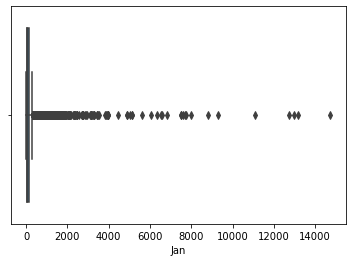

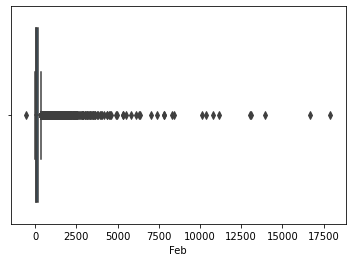

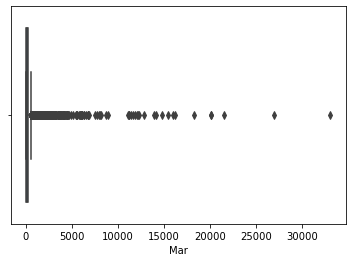

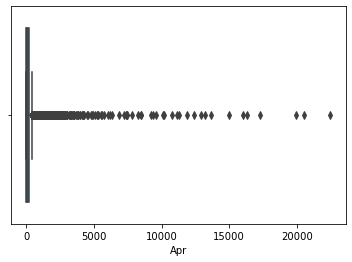

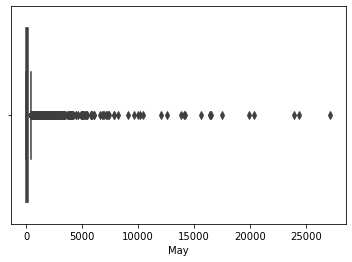

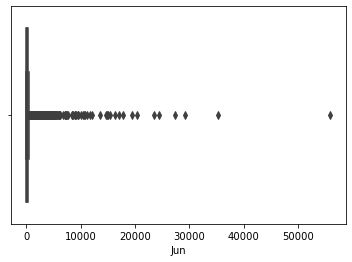

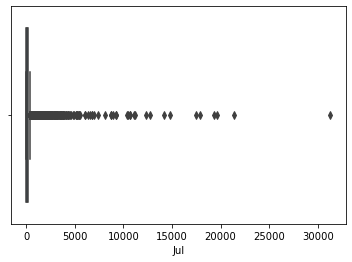

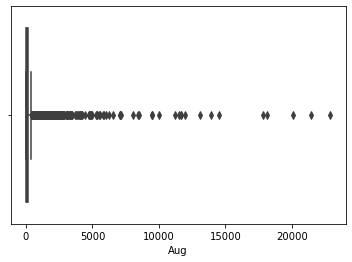

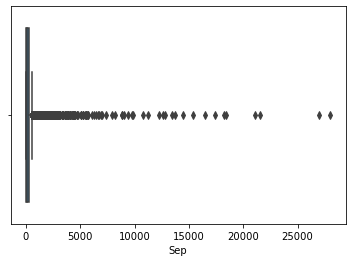

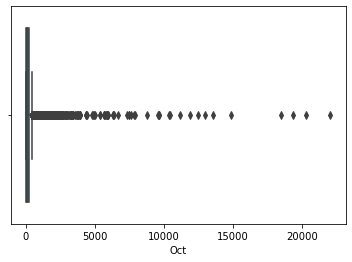

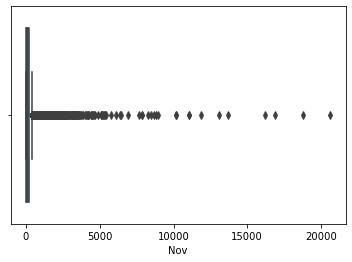

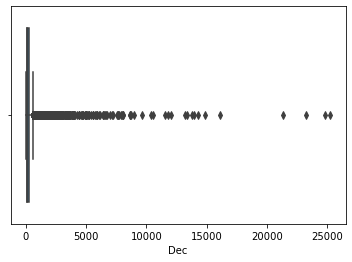

In [102]:
# Plottingbox plot of eaches for every month 
import seaborn as sns
import matplotlib.pyplot as plt
for i in seas_SKU:
    if i not in ['SKU','CategoryID','SKU.1','SupplierID','Measure']:
        sns.boxplot(x=seas_SKU[i])
        plt.show()

In [103]:
stat_seas = stat_seas.T

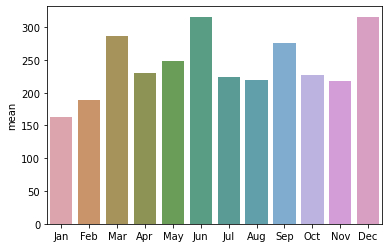

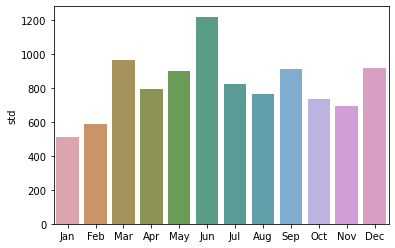

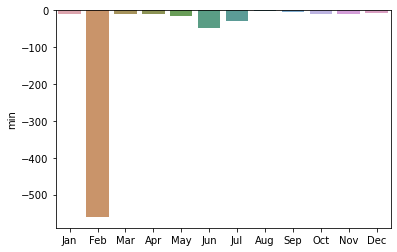

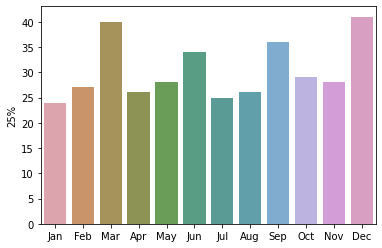

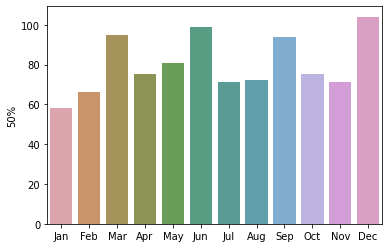

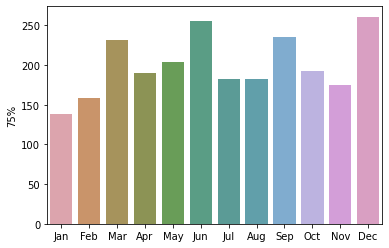

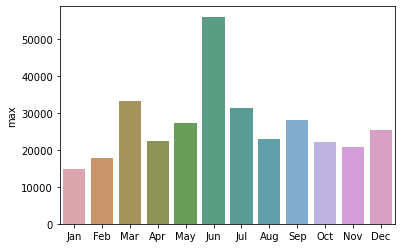

In [104]:
# Plotting mean,std,min,max etc across various months
for i in stat_seas:
    if i not in ['count']:
        x = sns.barplot(x=stat_seas.index, y=stat_seas[i], data=stat_seas, saturation=.5)
        plt.show()

# Q7. Calculate COV of Demand for each product
**COV (in units)=(Std.Dev of Units)/(Avg of Units).**

Create three clusters (Low, Med, High) in increasing order of COV with top 50% of units in Low, Next 30% in medium and bottom 20% in high.

In [41]:
demand_flat.head(10)

,SKU,Month,Sales,GM,Eaches,Weight,Volume
0,110053,Jan,559,333,56,15,1
45850,110053,Mar,755,452,75,20,1
68775,110053,Apr,769,457,77,20,1
91700,110053,May,519,309,52,14,1
114625,110053,Jun,919,547,92,24,2
137550,110053,Jul,519,309,52,14,1
160475,110053,Aug,709,422,71,18,1
183400,110053,Sep,779,459,79,21,2
206325,110053,Oct,589,350,59,15,1
229250,110053,Nov,519,309,52,14,1


In [42]:
df3 = demand_flat[['SKU','Eaches']]

In [43]:
# Taking standard deviation across each SKU
df4 = df3.groupby(['SKU']).std()

In [44]:
# Taking mean across each SKU
df4['avg'] = df3.groupby(['SKU']).mean()

In [45]:
# Calculating COV
df4['COV'] = df4['Eaches']/df4['avg']
df4.head()

,Eaches,avg,COV
SKU,,,
110053,49.943832,80.750000,0.618499
110054,45.519892,56.333333,0.808045
110056,27.493250,49.666667,0.553555
110124,28.633922,144.916667,0.197589
110125,25.732305,102.166667,0.251866


In [46]:
COV_sorted = df4.sort_values(['COV'])
COV_sorted.shape

(22923, 3)

In [47]:
# For a particular SKU we see that avg. of eaches is -ve
demand_flat.query('SKU==8379521')

,SKU,Month,Sales,GM,Eaches,Weight,Volume
175973,8379521,Aug,7,3,1,0,0
221823,8379521,Oct,0,0,0,0,0
38423,8379521,Feb,0,0,0,0,0
84273,8379521,Apr,0,0,0,0,0
267673,8379521,Dec,0,0,0,0,0
130123,8379521,Jun,14,5,2,1,0
153048,8379521,Jul,0,0,0,0,0
244748,8379521,Nov,-2,3,-1,0,0
61348,8379521,Mar,0,0,0,0,0
107198,8379521,May,-21,-4,-4,-1,0


In [48]:
# Such SKUs have -ve COV
COV_sorted.head(10)

,Eaches,avg,COV
SKU,,,
8379521,1.443376,-0.083333,-17.320508
8322547,1.083625,-0.083333,-13.003496
2021814,0.900337,-0.083333,-10.804040
8141749,0.792961,-0.083333,-9.515538
8217747,0.668558,-0.083333,-8.022695
8264103,0.514929,-0.083333,-6.179144
8101933,1.614330,-0.333333,-4.842989
8087439,0.717741,-0.166667,-4.306443
8337768,0.288675,-0.083333,-3.464102


In [49]:
COV_sorted.to_csv('COV.csv')

In [52]:
# Top 50% ie Low
COV_low = COV_sorted[:COV_sorted.shape[0]//2]
COV_low.shape

(11461, 3)

In [53]:
# Next 30% ie Medium
COV_med = COV_sorted[COV_sorted.shape[0]//2:COV_sorted.shape[0]//2+COV_sorted.shape[0]*3//10]
COV_med.shape

(6876, 3)

In [54]:
# Next 20% ie High
COV_high = COV_sorted[COV_sorted.shape[0]//2+COV_sorted.shape[0]*3//10:]
COV_high.shape

(4586, 3)

# Q8. Generate a pareto by SKU (in terms of Sales Value) and see how many SKUs account for top 80%, next 15%, and bottom 5% of the sales

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
rank = pd.read_csv('rank.csv')

In [4]:
rank.head(10)

,SKU,Sales,GM,Eaches,Weight,Volume,CategoryID,SKU.1,SupplierID,rank_CategoryID_Sales,rank_SupplierID_Sales
0,110053,756.083333,429.416667,80.750000,21.166667,1.500000,460,Active,3452,8,201
1,110054,519.500000,291.166667,56.333333,12.416667,1.333333,460,Active,3452,8,201
2,110056,471.166667,254.916667,49.666667,14.000000,1.000000,460,Active,3452,8,201
3,110124,1285.416667,745.000000,144.916667,81.083333,1.000000,460,Active,3452,8,201
4,110125,905.666667,535.416667,102.166667,59.250000,0.916667,460,Active,3452,8,201
5,110239,23502.250000,9117.083333,141.083333,2237.750000,84.500000,460,Active,52070,8,181
6,110742,19176.166667,6986.083333,124.166667,1999.333333,75.250000,460,Active,52070,8,181
7,140005,2741.916667,1716.250000,102.583333,139.416667,85.583333,460,Active,3452,8,201
8,140013,2025.416667,1207.500000,217.833333,43.583333,1.500000,460,Active,52070,8,181
9,140014,1115.916667,630.500000,88.000000,63.250000,1.333333,460,Active,52070,8,181


In [5]:
pareto_df = rank[['SKU','Sales']]

In [6]:
pareto_df = pareto_df.sort_values(by='Sales',ascending=False)
pareto_df["cumpercentage"] = pareto_df["Sales"].cumsum()/pareto_df["Sales"].sum()*100

In [7]:
pareto_df.head()

,SKU,Sales,cumpercentage
6082,8265233,83170.833333,0.319098
3790,8088379,68295.166667,0.581123
5142,8203929,61322.833333,0.816398
4304,8142606,60660.583333,1.049132
7429,8348955,58754.416667,1.274553


In [8]:
pareto_df.to_csv('pareto_SKU.csv',index=False)

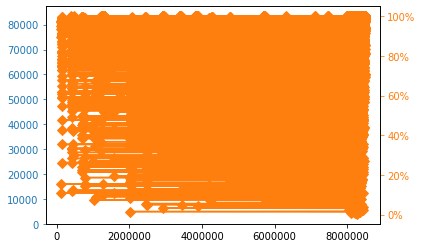

In [111]:
fig, ax = plt.subplots()
ax.bar(pareto_df['SKU'], pareto_df["Sales"], color="C0")
ax2 = ax.twinx()
ax2.plot(pareto_df['SKU'], pareto_df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

(0, 110)

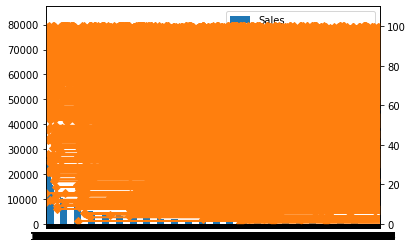

In [112]:
fig, axes = plt.subplots()
ax1 = pareto_df.plot(use_index=True, y='Sales',  kind='bar', ax=axes)
ax2 = pareto_df.plot(use_index=True, y='cumpercentage', marker='D', color="C1", kind='lisne', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])

In [10]:
pareto_ID = rank[['Sales','CategoryID','SupplierID']]

In [13]:
pareto_ID.head()

,Sales,CategoryID,SupplierID
0,756.083333,460,3452
1,519.500000,460,3452
2,471.166667,460,3452
3,1285.416667,460,3452
4,905.666667,460,3452


In [15]:
cat_par = pareto_ID[['CategoryID','Sales']].groupby('CategoryID').agg('sum')
sup_par = pareto_ID[['SupplierID','Sales']].groupby('SupplierID').agg('sum')

In [18]:
cat_par.head()

,Sales
CategoryID,
200,3.449941e+05
310,3.165176e+06
320,1.751735e+06
330,4.040084e+06
340,2.453166e+06


In [20]:
cat_par = cat_par.sort_values(by='Sales',ascending=False)
cat_par["cumpercentage"] = cat_par["Sales"].cumsum()/cat_par["Sales"].sum()*100

In [22]:
sup_par = sup_par.sort_values(by='Sales',ascending=False)
sup_par["cumpercentage"] = sup_par["Sales"].cumsum()/sup_par["Sales"].sum()*100
sup_par.head()

,Sales,cumpercentage
SupplierID,,
52070,3.878076e+06,14.878850
51726,2.474093e+06,24.371097
88111,1.515727e+06,30.186424
16934,9.543797e+05,33.848053
3801,8.845327e+05,37.241702


In [24]:
cat_par.to_csv('pareto_cat.csv')
sup_par.to_csv('pareto_sup.csv')